# **Credit Card Lead Prediction**

# *PROBLEM_STATEMENT :*

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc.

In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

Customer details (gender, age, region etc.)
Details of his/her relationship with the bank (ChannelCode,Vintage, 'AvgAsset_Value etc.)

# *COLUMNS_Details*

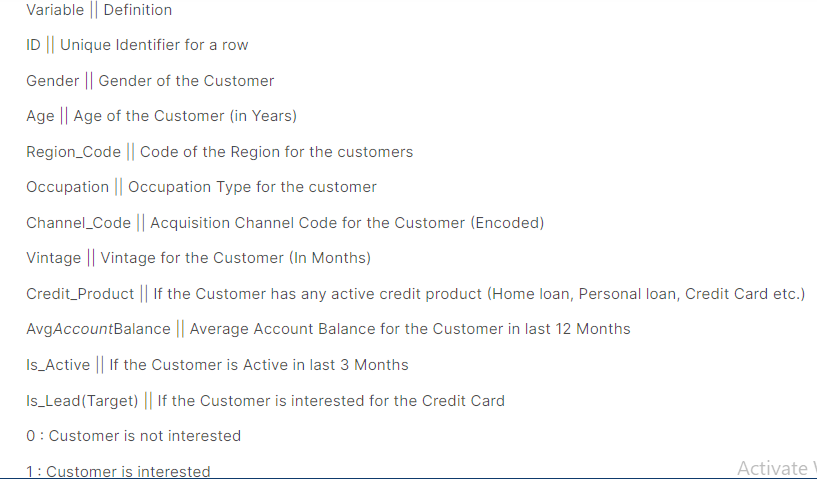

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline

In [2]:
df=pd.read_csv('/content/train_s3TEQDk.csv')

In [3]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [6]:
df.shape

(245725, 11)

In [7]:
for cols in df.columns:
  print("{}: Unique -> {}, Count: {}".format(cols,df[cols].unique(),(df[cols].nunique())))

ID: Unique -> ['NNVBBKZB' 'IDD62UNG' 'HD3DSEMC' ... 'GEHAUCWT' 'GE7V8SAH' 'BOCZSWLJ'], Count: 245725
Gender: Unique -> ['Female' 'Male'], Count: 2
Age: Unique -> [73 30 56 34 62 48 40 55 53 27 31 79 33 46 59 65 37 44 32 50 70 25 52 26
 67 29 41 49 63 61 64 60 76 57 36 28 58 43 35 71 82 45 42 54 47 78 51 68
 83 39 84 24 38 74 81 69 75 85 66 80 72 77 23], Count: 63
Region_Code: Unique -> ['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271'], Count: 35
Occupation: Unique -> ['Other' 'Salaried' 'Self_Employed' 'Entrepreneur'], Count: 4
Channel_Code: Unique -> ['X3' 'X1' 'X2' 'X4'], Count: 4
Vintage: Unique -> [ 43  32  26  19  33  20  13  38  49 123  14  31  57  69  97  15  63  21
  99  56  87  62  55 103 104  93  61  91  27  39  50  45  25 117  80  81
  73  67 1

In [8]:
df.drop(['ID'],axis=1,inplace=True)

In [9]:
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [10]:
df.groupby('Gender').count()

,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
Gender,,,,,,,,,
Female,111528,111528,111528,111528,111528,100481,111528,111528,111528
Male,134197,134197,134197,134197,134197,115919,134197,134197,134197


In [11]:
df['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [12]:
df.isnull().count()

Gender                 245725
Age                    245725
Region_Code            245725
Occupation             245725
Channel_Code           245725
Vintage                245725
Credit_Product         245725
Avg_Account_Balance    245725
Is_Active              245725
Is_Lead                245725
dtype: int64

In [13]:
df.groupby('Region_Code').count()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
Region_Code,,,,,,,,,
RG250,2496,2496,2496,2496,2496,2323,2496,2496,2496
RG251,5950,5950,5950,5950,5950,5235,5950,5950,5950
RG252,4286,4286,4286,4286,4286,4056,4286,4286,4286
RG253,1858,1858,1858,1858,1858,1592,1858,1858,1858
RG254,26840,26840,26840,26840,26840,24100,26840,26840,26840
RG255,2018,2018,2018,2018,2018,1801,2018,2018,2018
RG256,2847,2847,2847,2847,2847,2661,2847,2847,2847
RG257,6101,6101,6101,6101,6101,5529,6101,6101,6101
RG258,1951,1951,1951,1951,1951,1728,1951,1951,1951


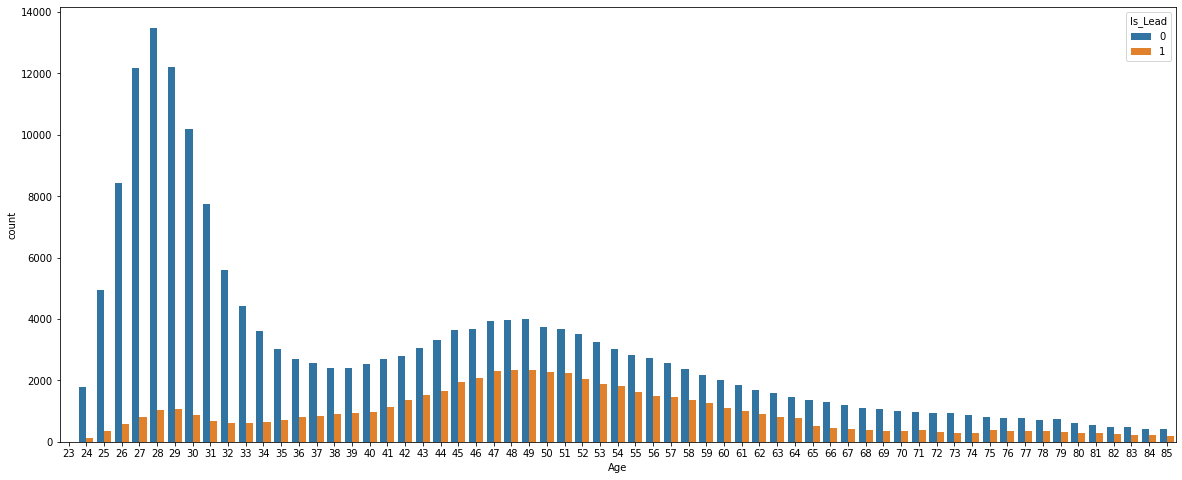

In [14]:
plt.figure(figsize=(20,8))
sns.countplot(x='Age',data=df,hue='Is_Lead')

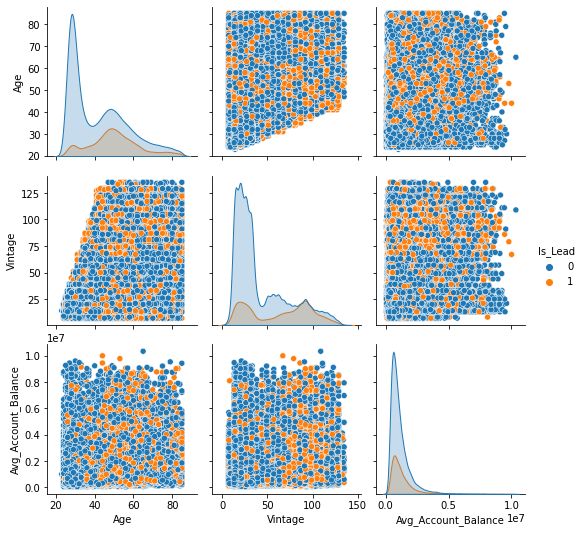

In [15]:
sns.pairplot(df,hue='Is_Lead')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


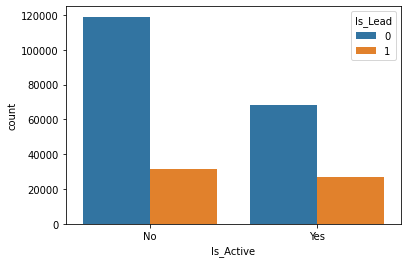

In [16]:
sns.countplot('Is_Active',data=df,hue='Is_Lead')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


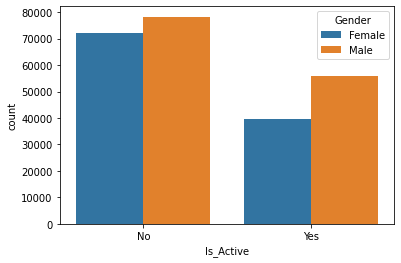

In [17]:
sns.countplot('Is_Active',data=df,hue='Gender')

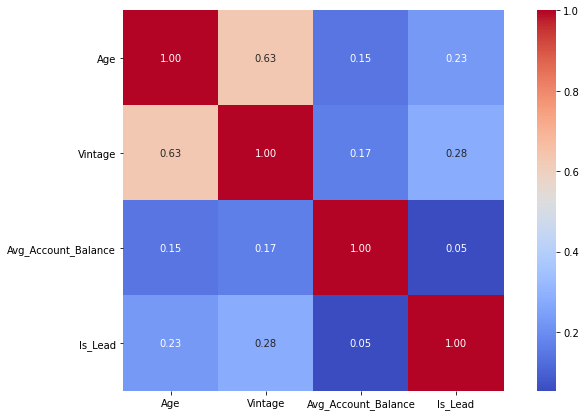

In [18]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':10},cmap='coolwarm')

In [19]:
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [20]:
from sklearn.preprocessing import LabelEncoder
lb_en=LabelEncoder()

In [21]:
df['Gender']=lb_en.fit_transform(df['Gender'])
df['Is_Active']=lb_en.fit_transform(df['Is_Active'])
df['Channel_Code']=lb_en.fit_transform(df['Channel_Code'])
df['Region_Code']=lb_en.fit_transform(df['Region_Code'])
df['Occupation']=lb_en.fit_transform(df['Occupation'])

#Columns :Credit_Product have ***nan*** Values 

In [22]:
df['Credit_Product'].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [23]:
df['Credit_Product'].isna().sum()

29325

In [24]:
df.Credit_Product.replace(np.nan,'No',regex = True,inplace=True)

In [25]:
df['Credit_Product'].isna().sum()

0

In [26]:
df['Credit_Product']=lb_en.fit_transform(df['Credit_Product'])

In [27]:
df

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,0,1045696,0,0
1,0,30,27,2,0,32,0,581988,0,0
2,0,56,18,3,2,26,0,1484315,1,0
3,1,34,20,2,0,19,0,470454,0,0
4,0,30,32,2,0,33,0,886787,0,0
...,...,...,...,...,...,...,...,...,...,...
245720,1,51,34,3,2,109,0,1925586,0,0
245721,1,27,18,2,0,15,0,862952,1,0
245722,0,26,31,2,0,13,0,670659,0,0
245723,0,28,23,2,0,31,0,407504,0,0


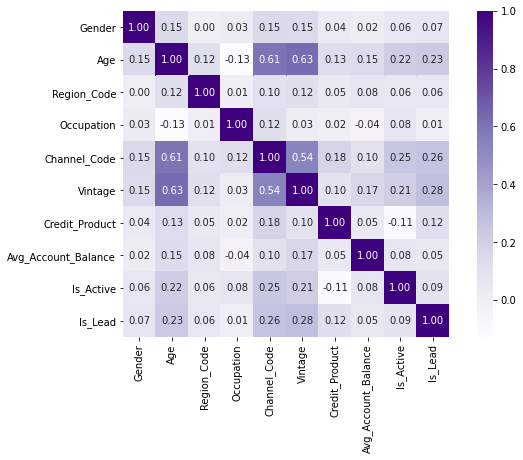

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':10},cmap='Purples')

In [29]:
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,0,1045696,0,0
1,0,30,27,2,0,32,0,581988,0,0
2,0,56,18,3,2,26,0,1484315,1,0
3,1,34,20,2,0,19,0,470454,0,0
4,0,30,32,2,0,33,0,886787,0,0


In [30]:
#Independent and Dependent features 
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [31]:
print("Shape of Independent features :",X.shape)
print("Shape of Dependent features :",y.shape)

Shape of Independent features : (245725, 9)
Shape of Dependent features : (245725,)


In [32]:
df['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)

In [34]:
#sacling the dataset
from sklearn.preprocessing import StandardScaler
Scaler =StandardScaler()
X_Scale_train=Scaler.fit_transform(X_train)
X_Scale_test=Scaler.fit_transform(X_test)

In [35]:
#Balancing the target
from imblearn.under_sampling import RandomUnderSampler
sampler=RandomUnderSampler(random_state=1)
X_bal,y_bal =sampler.fit_resample(X_Scale_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [36]:
np.count_nonzero(y_bal)

40577

In [37]:
y_bal.shape

(81154,)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [39]:
##Logistic Regression 
Lr=LogisticRegression()
Lr.fit(X_bal,y_bal)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_Lr=Lr.predict(X_Scale_test)

In [41]:
print("Accuracy_score :",metrics.accuracy_score(y_test,y_Lr))

Accuracy_score : 0.6485932879351041


In [42]:
from sklearn.pipeline import Pipeline

In [43]:
pipe_Lr=Pipeline([('scaler1',StandardScaler()),
                  ('Lr',LogisticRegression())])
pipe_Knn=Pipeline([('scaler2',StandardScaler()),
                   ('Knn',KNeighborsClassifier())])
pipe_SVC=Pipeline([('scaler3',StandardScaler()),
                   ('SVC',SVC())])
pipe_RF=Pipeline([('scaler4',StandardScaler()),
                  ('RF',RandomForestClassifier())])
pipe_DT=Pipeline([('scaler5',DecisionTreeClassifier())])

In [44]:
pipeline=[pipe_Lr,pipe_Knn,pipe_SVC,pipe_RF,pipe_DT]

In [45]:
pipe_dict={0:'Logistic_Regression',1:'KNeighborsClassifier',2:'SVC',3:'Random_Forest_Classifier',4:'Decision_Tree'}

In [46]:
for pipe in pipeline:
  pipe.fit(X_bal,y_bal)

In [47]:
for i,models in enumerate(pipeline):
  print("{} Accuracy : {}".format(pipe_dict[i],models.score(X_Scale_test,y_test)))

Logistic_Regression Accuracy : 0.6485932879351041
KNeighborsClassifier Accuracy : 0.6724816191432215
SVC Accuracy : 0.659947366993136
Random_Forest_Classifier Accuracy : 0.6911609104967579
Decision_Tree Accuracy : 0.6215035676496921


Optimising the KNN by finding the nneighbour which have less error:



In [48]:
error_rate=[]
for i in range(1,40):
  model_Knn=KNeighborsClassifier(n_neighbors=i)
  model_Knn.fit(X_bal,y_bal)
  pred_i=model_Knn.predict(X_Scale_test)
  error_rate.append(np.mean(pred_i != y_test))

[]

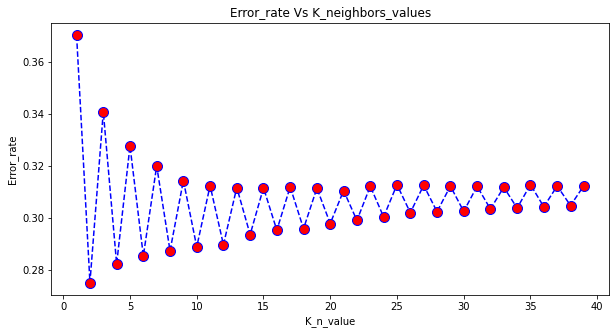

In [49]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error_rate Vs K_neighbors_values')
plt.xlabel('K_n_value')
plt.ylabel('Error_rate')
plt.plot()

In [50]:
model_Knn=KNeighborsClassifier(n_neighbors=2)
model_Knn.fit(X_bal,y_bal)
pred_Knn=model_Knn.predict(X_Scale_test)

In [51]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,pred_Knn))

Accuracy_Score : 0.7250061043435796


Now Hyper-tuning in Random Forest Classification to better accuracy rate :

Using ->Randomised Search Cv

In [52]:
rf=RandomForestClassifier()

In [53]:
sorted(rf.get_params().keys())

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [54]:
from sklearn.model_selection import RandomizedSearchCV

The main prameters in Random Forest Search is:

1. 'n_estimators' :no. of tree in ensamble
2. 'max_depth' : max no. of levels allowed
3. 'criterion' : funiction used evaluate the quality of split
4. 'max_features' :max no. features considered while spliting a node
5. 'min_samples_leaf':min no. of sample which can stored in tree while spliting
6. 'min_samples_split' :min no. sample required in a node to cause node split



In [55]:
parms={
    'criterion':['entropy','gini'],
    'max_depth':[int(x) for x in np.linspace(100,1000,10)],
    'n_estimators':[int(x) for x in np.linspace(100,1000,10)],
    'max_features':['auto','log2','sqrt'],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4,6,8]
}

In [56]:
rf=RandomizedSearchCV(estimator=rf,param_distributions=parms,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=1)

In [57]:
rf.fit(X_bal,y_bal)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 15.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [58]:
rf.best_params_

{'criterion': 'entropy',
 'max_depth': 900,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 800}

In [59]:
best=rf.best_estimator_
best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=900, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
model_rf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=300, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
model_rf.fit(X_bal,y_bal)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=300, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
pred=model_rf.predict(X_Scale_test)
print("Accuracy Score : ",metrics.accuracy_score(y_test,pred))
print('roc_auc:',metrics.roc_auc_score(y_test,pred))

Accuracy Score :  0.7008871646002334
roc_auc: 0.7186964116075747


Working on Testing data:

*   Handle NaN
*   Encoding
*   Scaling




In [63]:
df_Test=pd.read_csv('/content/test_mSzZ8RL.csv')

In [64]:
df_Test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [65]:
X_test_final=df_Test.iloc[:,1:]

In [66]:
X_test_final.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,RG254,Other,X1,25,Yes,742366,No
1,Male,43,RG268,Other,X2,49,NaN,925537,No
2,Male,31,RG270,Salaried,X1,14,No,215949,No
3,Male,29,RG272,Other,X1,33,No,868070,No
4,Female,29,RG270,Other,X1,19,No,657087,No


In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [68]:
X_test_final['Credit_Product'].unique()

array(['Yes', nan, 'No'], dtype=object)

In [69]:
X_test_final['Credit_Product'].isna().sum()

12522

In [70]:
X_test_final.shape

(105312, 9)

In [71]:
X_test_final['Credit_Product'].replace(np.nan,'No',regex=True,inplace=True)

In [72]:
X_test_final['Credit_Product'].isna().sum()

0

In [73]:
Lb_encode=LabelEncoder()

In [74]:
X_test_final['Channel_Code'] =Lb_encode.fit_transform(X_test_final['Channel_Code'])
X_test_final['Credit_Product'] =Lb_encode.fit_transform(X_test_final['Credit_Product'])
X_test_final['Gender'] =Lb_encode.fit_transform(X_test_final['Gender'])
X_test_final['Is_Active']=Lb_encode.fit_transform(X_test_final['Is_Active'])
X_test_final['Region_Code'] = Lb_encode.fit_transform(X_test_final['Region_Code'])
X_test_final['Occupation']=Lb_encode.fit_transform(X_test_final['Occupation'])

In [75]:
X_test_final.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,29,4,1,0,25,1,742366,0
1,1,43,18,1,1,49,0,925537,0
2,1,31,20,2,0,14,0,215949,0
3,1,29,22,1,0,33,0,868070,0
4,0,29,20,1,0,19,0,657087,0


In [76]:
Scale =StandardScaler()
X_test_final =Scale.fit_transform(X_test_final)

In [77]:
X_test_final

array([[ 0.90829868, -0.99987782, -1.45176439, ...,  1.54186026,
        -0.45233323, -0.80668205],
       [ 0.90829868, -0.05856336, -0.16779796, ..., -0.6485672 ,
        -0.2408777 , -0.80668205],
       [ 0.90829868, -0.86540432,  0.01562582, ..., -0.6485672 ,
        -1.06003743, -0.80668205],
       ...,
       [ 0.90829868, -0.59645734, -1.45176439, ..., -0.6485672 ,
         0.65747727, -0.80668205],
       [ 0.90829868,  0.6138041 , -1.45176439, ..., -0.6485672 ,
        -0.45832234,  1.23964578],
       [ 0.90829868, -1.13435131, -1.26834061, ..., -0.6485672 ,
        -0.62642032, -0.80668205]])

In [78]:
Predicted =model_rf.predict(X_test_final)

In [79]:
submit =pd.DataFrame({'Id':df_Test['ID'],
                      'Predicted':Predicted})

In [80]:
submit.head()

,Id,Predicted
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [81]:
submit.to_csv('Submission.csv',index=False)